In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Read single data file.
x, y, z = np.genfromtxt('data/JulianTrajs/alive/cell002.dat', unpack=True)

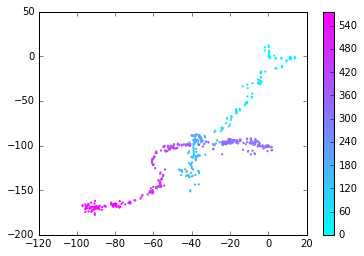

In [3]:
plt.scatter(x, y, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
plt.colorbar()

(-100, 100)

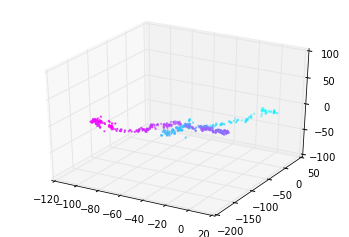

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
ax.set_zlim(-100, 100)
#plt.colorbar(ax)

In [9]:
# Read all data files of one category.
category='plastic'

import os
data_dir = 'data/JulianTrajs/' + category
trajectories = []  # dimensions: trajectory index -> time step -> coordinate (x, y, z)
for filename in os.listdir(data_dir):
    print filename, '->',
    trajectory = np.genfromtxt(os.path.join(data_dir, filename))
    print trajectory.shape[0], 'time steps'
    trajectories.append(trajectory)
trajectories = np.array(trajectories)

cell001.dat -> 998 time steps
cell002.dat -> 998 time steps
cell003.dat -> 998 time steps
cell004.dat -> 998 time steps
cell005.dat -> 998 time steps
cell006.dat -> 998 time steps
cell007.dat -> 998 time steps
cell008.dat -> 998 time steps
cell009.dat -> 998 time steps
cell010.dat -> 998 time steps
cell011.dat -> 998 time steps
cell012.dat -> 998 time steps
cell013.dat -> 998 time steps
cell014.dat -> 998 time steps
cell015.dat -> 998 time steps
cell016.dat -> 998 time steps
cell017.dat -> 998 time steps
cell018.dat -> 998 time steps
cell019.dat -> 998 time steps
cell020.dat -> 998 time steps
cell021.dat -> 998 time steps
cell022.dat -> 998 time steps
cell023.dat -> 998 time steps
cell024.dat -> 998 time steps
cell025.dat -> 998 time steps
cell026.dat -> 998 time steps
cell027.dat -> 998 time steps
cell028.dat -> 998 time steps
cell029.dat -> 998 time steps
cell030.dat -> 998 time steps
cell031.dat -> 998 time steps
cell032.dat -> 998 time steps
cell033.dat -> 998 time steps
cell034.da

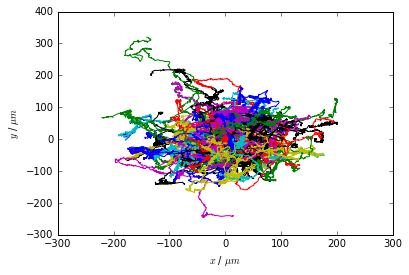

In [10]:
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.plot(0, 0, 'ro', markersize=7, mec='none')
plt.xlabel('$x$ / $\mu m$')
plt.ylabel('$y$ / $\mu m$')
plt.savefig('plots/all_{}.png'.format(category), dpi=300)

# TODO: Maybe make heatmap

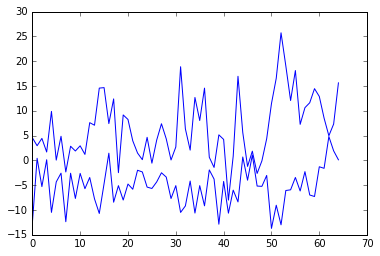

In [7]:
plt.plot(np.min(trajectories, axis=2)[:, 2], 'b')
plt.plot(np.max(trajectories, axis=2)[:, 2], 'b')

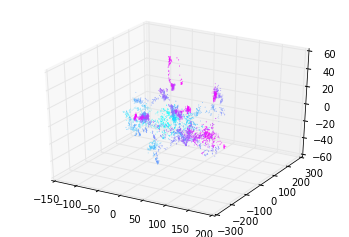

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in trajectories[::10]:
    ax.scatter(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c=np.arange(len(x)), cmap='cool', s=1, edgecolor='')
#ax.set_zlim(-100, 100)
plt.savefig('plots/all_alive_3D.png', dpi=300)